In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk

from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

data = pd.read_csv("HistoryViewsModerns.csv",index_col=0)

data['day'] = pd.to_datetime(data['day'], format='%Y%m%d')

display(data.head())

,day,Donald_Trump,Barack_Obama,Ronald_Reagan,George_H._W._Bush,Bill_Clinton,George_W._Bush,Nelson_Mandela,Justin_Trudeau,Angela_Merkel,...,Louis_C.K.,Mark_Zuckerberg,Steve_Jobs,Warren_Buffett,George_Soros,Bill_Gates,Jeff_Bezos,Bruce_Lee,Jackie_Chan,Jet_Li
0,2015-07-01,81749,28001,10885,9294,12072,11888,9571,2107,7882,...,5157,15140,27143,10361,2856,17070,2343,12908,10959,3735
1,2015-07-02,83055,25759,12377,8679,9687,11292,9082,1800,6071,...,5025,12915,41366,11750,3224,21325,2262,12801,10512,4006
2,2015-07-03,55174,24962,12544,9014,9610,10913,8775,1530,4586,...,5193,10134,27632,10653,3257,16184,1968,13646,11552,5298
3,2015-07-04,43373,25379,13741,8635,9581,10689,6633,1461,4345,...,5143,9151,22133,8595,3039,14825,1900,13708,11405,4190
4,2015-07-05,41914,25612,13575,9452,10662,12457,8179,1552,7668,...,5410,9668,21299,8512,2482,14646,1811,13872,12227,4395


In [2]:
people = pd.DataFrame(data.drop(columns = ['day']).mean(), columns = ['Mean_Daily_Views'])
people['Standard_Deviation'] = data.drop(columns = ['day']).std()
people['Coef_Var'] = people['Standard_Deviation']/people['Mean_Daily_Views']
people['Median'] = data.drop(columns = ['day']).median()
display(people.head())

,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median
Donald_Trump,109383.536195,285027.956553,2.605767,57392.5
Barack_Obama,33006.465488,37499.547324,1.136127,25781.5
Ronald_Reagan,18520.319865,26532.274242,1.432603,14204.5
George_H._W._Bush,14417.593434,26730.275099,1.854004,9647.0
Bill_Clinton,16268.127104,21755.971550,1.337337,11672.5


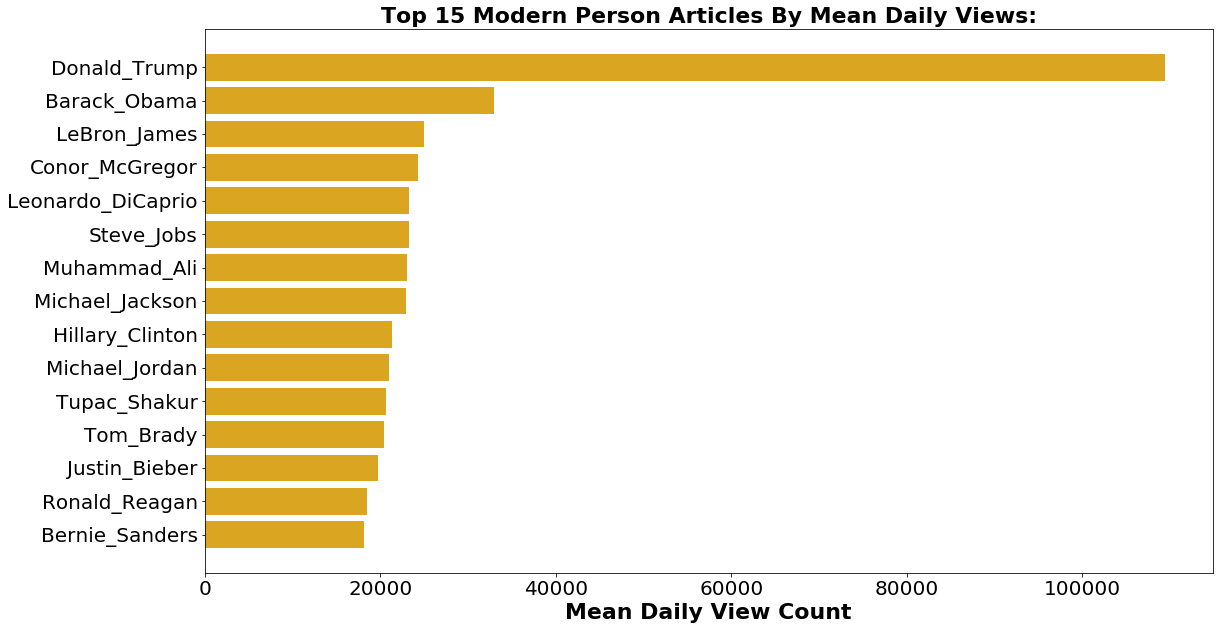

In [3]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

top_means = people.sort_values(by=['Mean_Daily_Views'], ascending=False).head(15)

fig, ax = plt.subplots(figsize=(20,10))
plt.barh(top_means.index.values, top_means['Mean_Daily_Views'], color='goldenrod')
plt.title('Top 15 Modern Person Articles By Mean Daily Views:', fontdict=font)
plt.xlabel('Mean Daily View Count',fontdict=font)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.gca().invert_yaxis()
plt.gcf().subplots_adjust(left=0.2)
#plt.savefig('PeopleMean.jpeg')
plt.show()

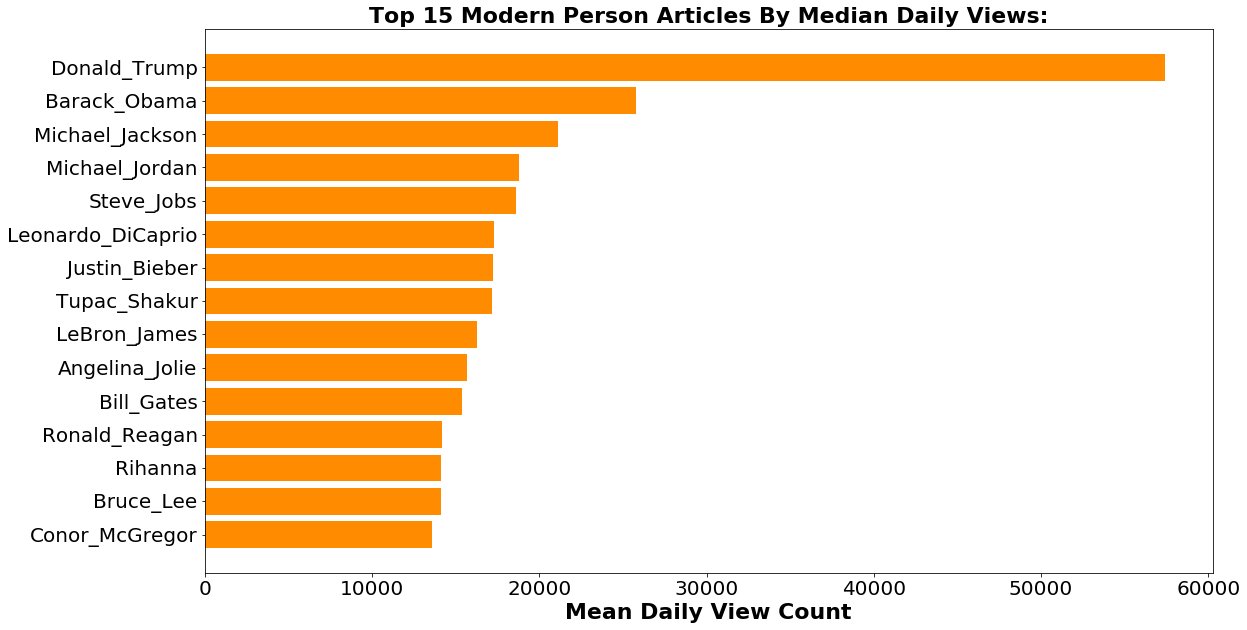

In [4]:
top_medians = people.sort_values(by=['Median'], ascending=False).head(15)

fig, ax = plt.subplots(figsize=(20,10))
plt.barh(top_medians.index.values, top_medians['Median'], color='darkorange')
plt.title('Top 15 Modern Person Articles By Median Daily Views:', fontdict=font)
plt.xlabel('Mean Daily View Count',fontdict=font)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.gca().invert_yaxis()
plt.gcf().subplots_adjust(left=0.2)
#plt.savefig('PeopleMean.jpeg')
plt.show()

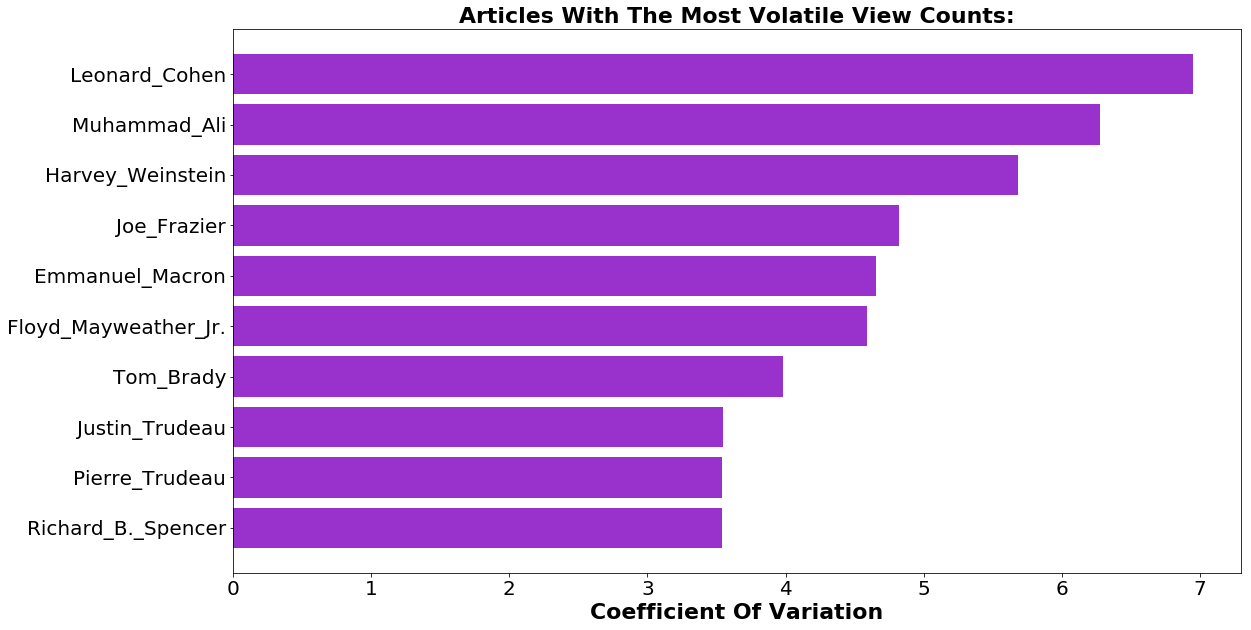

In [5]:
top_cvars = people.sort_values(by = ['Coef_Var'], ascending=False).head(10)

fig, ax = plt.subplots(figsize=(20,10))
plt.barh(top_cvars.index.values, top_cvars['Coef_Var'], color='darkorchid')
plt.title('Articles With The Most Volatile View Counts:', fontdict=font)
plt.xlabel('Coefficient Of Variation',fontdict=font)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.gca().invert_yaxis()
plt.gcf().subplots_adjust(left=0.2)
#plt.savefig('PeopleMean.jpeg')
plt.show()

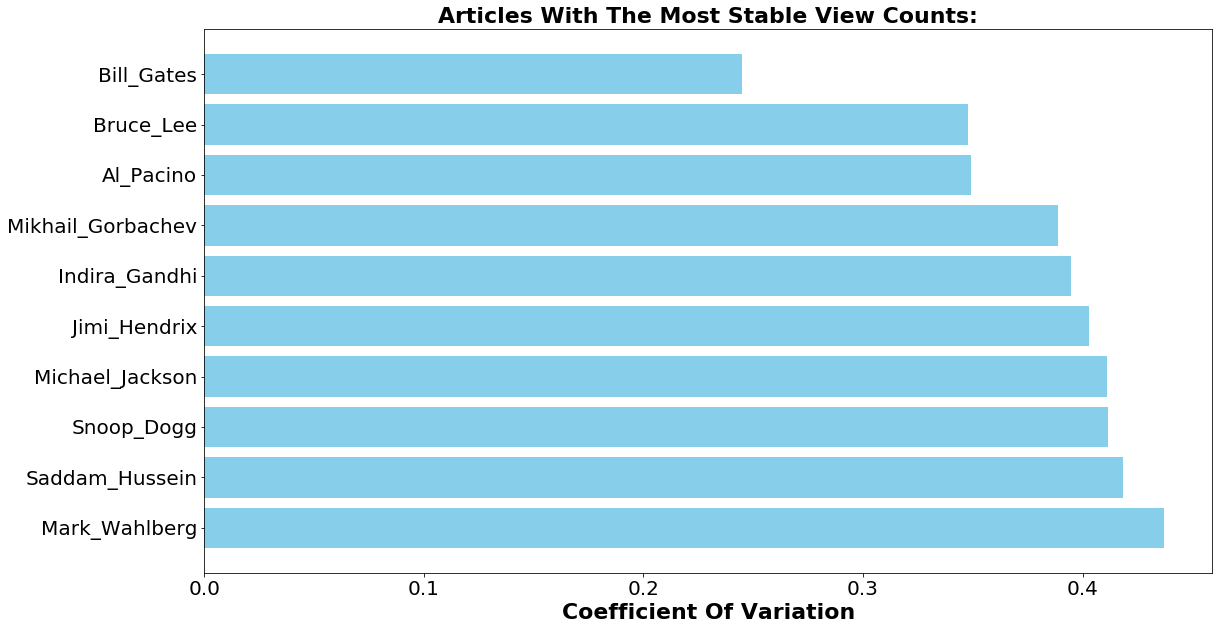

In [6]:
bottom_cvars = people.sort_values(by = ['Coef_Var'], ascending=True).head(10)

fig, ax = plt.subplots(figsize=(20,10))
plt.barh(bottom_cvars.index.values, bottom_cvars['Coef_Var'], color='skyblue')
plt.title('Articles With The Most Stable View Counts:', fontdict=font)
plt.xlabel('Coefficient Of Variation',fontdict=font)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.gca().invert_yaxis()
plt.gcf().subplots_adjust(left=0.2)
#plt.savefig('PeopleMean.jpeg')
plt.show()

In [7]:
def plot_daily(article):
    years = YearLocator()  
    months = MonthLocator()  
    monthsFmt = DateFormatter('%m')

    font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 22}

    fig, ax = plt.subplots(figsize=(20,5))

    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_minor_locator(months)
    ax.xaxis.set_minor_formatter(monthsFmt)

    ax.xaxis.set_tick_params(labelsize=20, pad=20)
    ax.xaxis.set_tick_params(which='minor',labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)

    plt.plot(data['day'], data[article])
    plt.title(f'Daily View Count: {article}', fontdict=font)
    plt.ylabel('Daily View Count',fontdict=font)
    plt.gcf().subplots_adjust(bottom=0.15)
    #plt.savefig(f'{article}_Daily_Line.jpeg')
    plt.show()
    
    pass

In [8]:
def bar_top5(article):
    top_days = (data[['day', article]]).sort_values(ascending=False, by=article).head()
    top_days.loc[-1] = ['Mean', data[article].mean()]

    fig, ax = plt.subplots(figsize=(20,5))
    plt.bar(top_days['day'].astype(str).str.slice(0,10), top_days[article], color='firebrick')
    plt.title(f'Top 5 Days: {article}', fontdict=font)
    plt.ylabel('Daily Viewcount',fontdict=font)

    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=15)
    
    #plt.savefig(f'{article}_Top5.jpeg')

    plt.show()

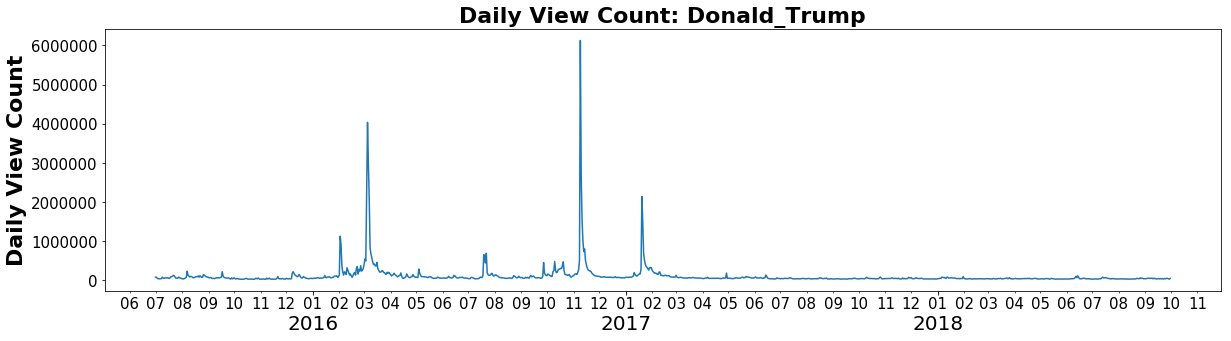

In [9]:
article = 'Donald_Trump'

plot_daily(article)

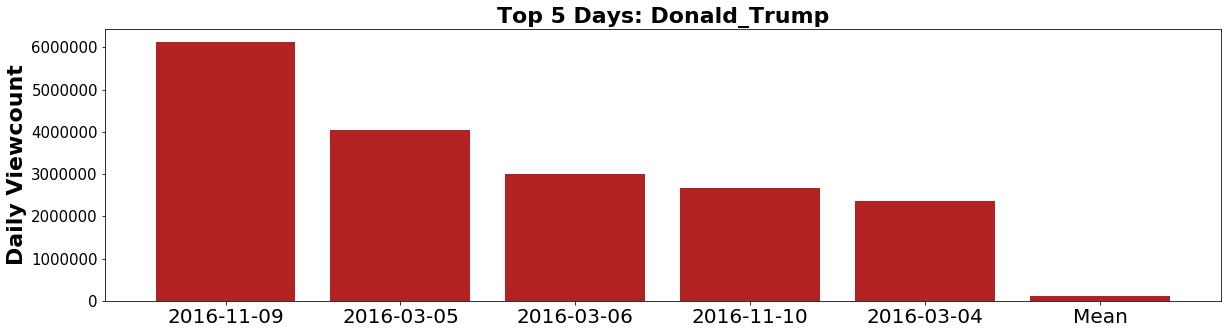

In [10]:
bar_top5(article)

### The 2016 election was on November 8, 2016. Super Tuesday, after which it was fairly certain that Donald Trump would be the nominee, was on March 1, 2016. 

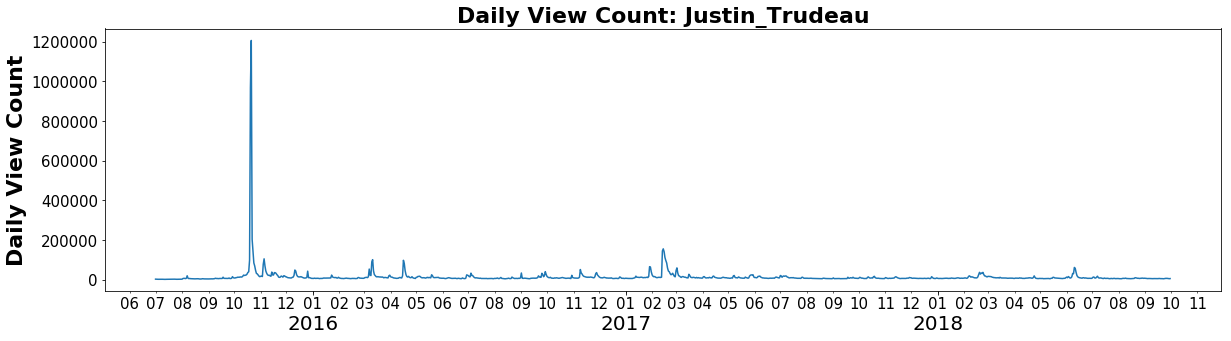

In [11]:
article = 'Justin_Trudeau'

plot_daily(article)

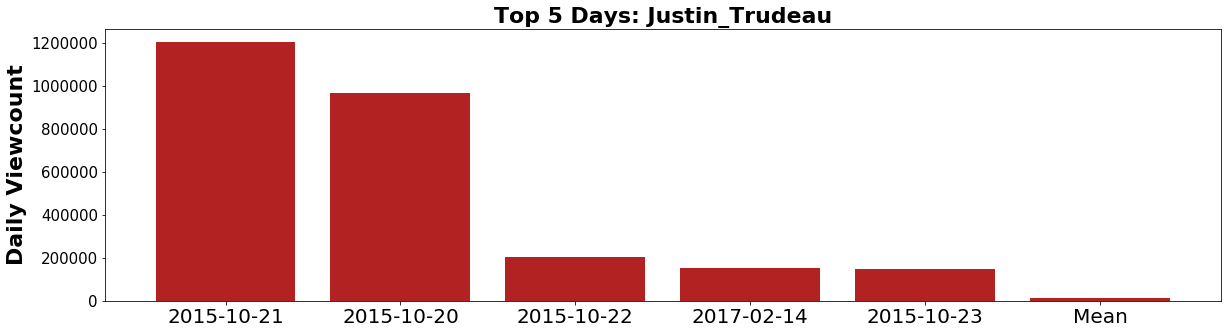

In [12]:
bar_top5(article)

### The Canadian election that propelled him to the Prime Ministership occurred on October 19, 2015. Trump met with Trudeau on February 13, 2017, and on the next day, Press Secretary Sean Spicer called him 'Joe' Trudeau, prompting Twitter hilarity.

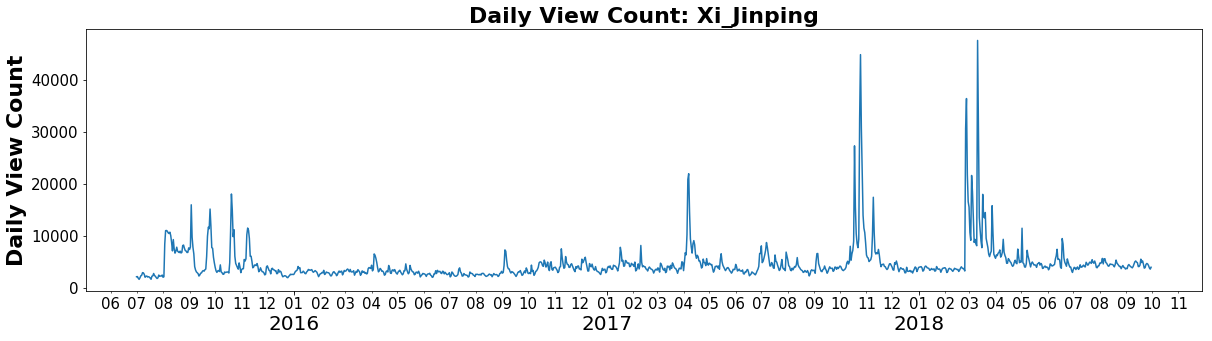

In [13]:
article = 'Xi_Jinping'

plot_daily(article)

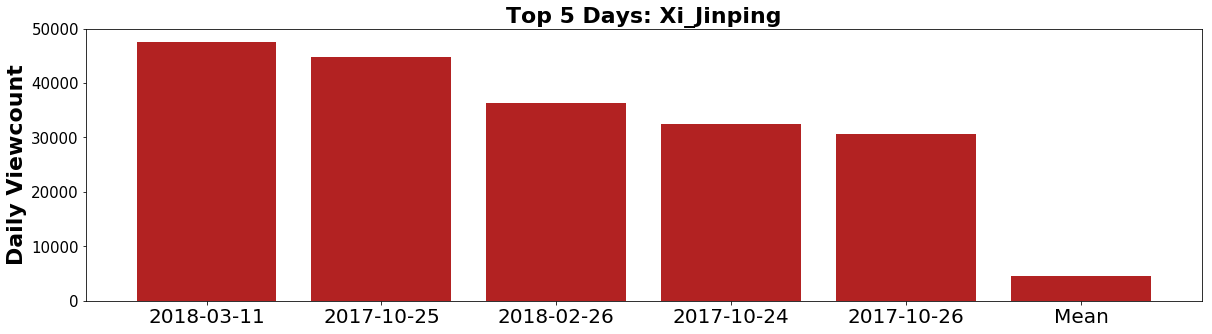

In [14]:
bar_top5(article)

### On March 11, 2018, constitutional term limits on the Chinese Presidency were abolished by a vote in the National Peoploe's Congress, paving the way for long time rule by Xi.  On October 25, 2017, Xi marked the end of his first term as President, and announced the new members of his Politburo Standing Committee. On February 26, 2018, the term limit abolishment proposal was initially announced.

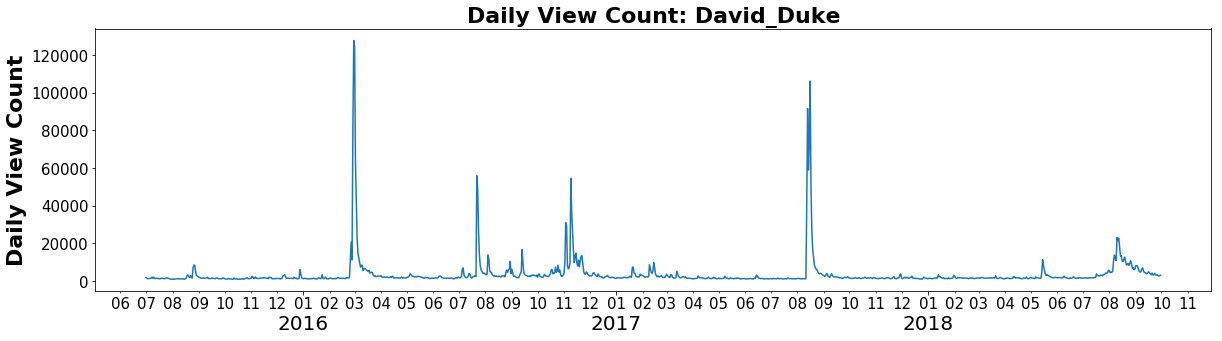

In [15]:
article = 'David_Duke'

plot_daily(article)

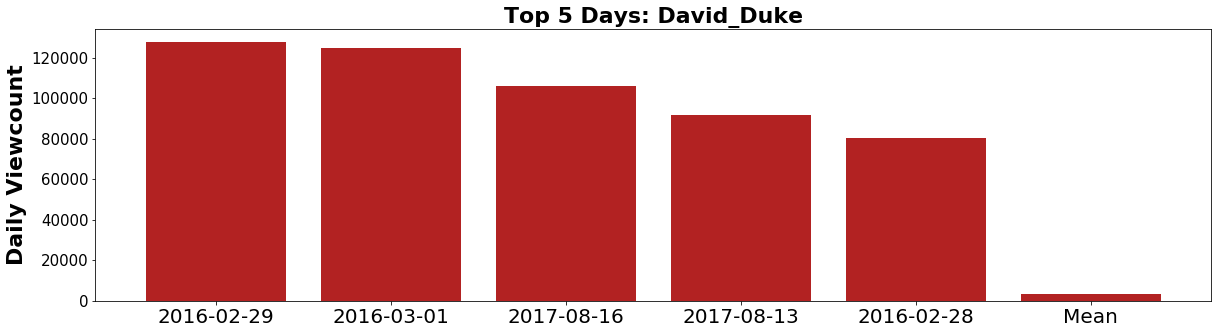

In [16]:
bar_top5(article)

### On February 29, 2016, Trump refused to explicitly disavow David Duke (who said that he supported Trump a few days before) in a CNN interview, leading to much criticism. August 13, 2017, was the day after the end of the Charlottesville protests, which Duke attended. On August 15, 2017, Duke praised Donald Trump for his controversial statements that both sides were to blame for the violence that occurred in Charlottesville, and many articles were written about this the next day. 

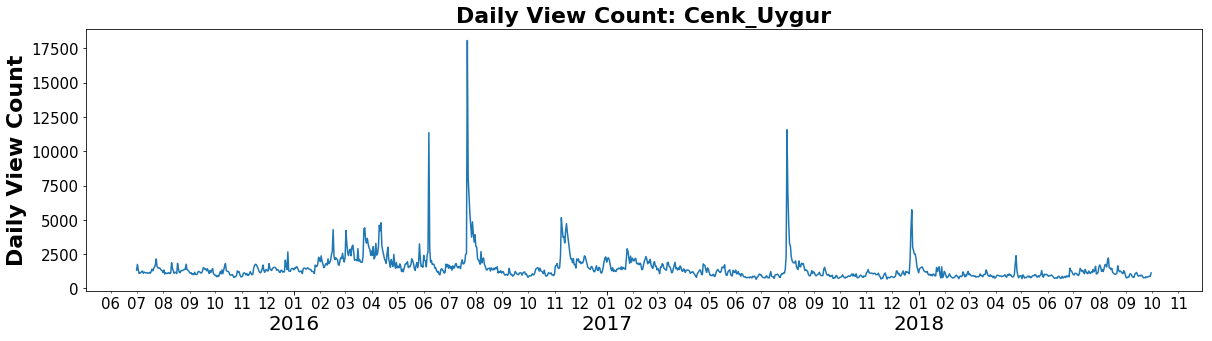

In [17]:
article = 'Cenk_Uygur'

plot_daily(article)

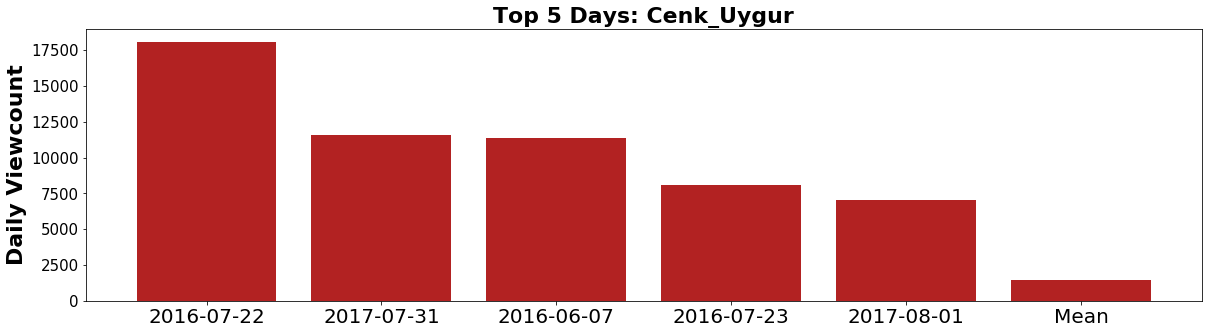

In [18]:
bar_top5(article)

### On July 22, 2016, Uygur, while taping a live show at the Republican National Convention, got into a heated confrontation with right-wing conspiracy theorists Alex Jones and Roger Stone, who came on stage and challenged Uygur to a debate. On July 31, 2017, Uygur had a debate at Politicon with popular ring-wing pundit Ben Shapiro. On June 7, 2016, it was clear that Hillary Clinton would defeat Bernie Sanders for the Democratic nomination, prompting some angry tweets by Uygur, who supported Bernie and believed the process was unfair to him.

In [19]:
data_smooth = data.copy()

for column in data_smooth.columns[1:]:
    sd = data_smooth[column].std()
    avg = data_smooth[column].mean()
    
    mask = data_smooth[column] > (avg + (sd*2))
    
    data_smooth.loc[mask, column] = (avg + (sd*2))

In [20]:
from sklearn.preprocessing import StandardScaler
data_scale = data_smooth.drop(columns = ['day'])

scaler = StandardScaler()
scaler.fit(data_scale)
data_scale = pd.DataFrame(scaler.transform(data_scale), columns = [data_scale.columns])
data_scale = data_scale.T

display(data_scale.head())

,0,1,2,3,4,5,6,7,8,9,...,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187
Donald_Trump,-0.095977,-0.083675,-0.346312,-0.457477,-0.471221,-0.507063,-0.453803,-0.413966,-0.082799,-0.314934,...,-0.436753,-0.550640,-0.460190,-0.449093,-0.467340,-0.364464,-0.391490,-0.472586,-0.568566,-0.411404
Barack_Obama,-0.179207,-0.320034,-0.370096,-0.343903,-0.329267,-0.354581,-0.422168,-0.511425,-0.519026,-0.517518,...,-0.785856,-0.890439,-0.822915,-0.687365,-0.697854,-0.716950,-0.688872,-0.691636,-0.866193,-0.879950
Ronald_Reagan,-0.626364,-0.473300,-0.456168,-0.333367,-0.350397,-0.480584,-0.307515,-0.541522,-0.578044,-0.418517,...,-0.699101,-0.455244,-0.538650,-0.695305,-0.734802,-0.753678,-0.628006,-0.697972,-0.774709,-0.753884
George_H._W._Bush,-0.340941,-0.401622,-0.368568,-0.405963,-0.325351,-0.293481,-0.319332,-0.414843,-0.191755,-0.203398,...,-0.496737,-0.504730,-0.486081,-0.486476,-0.472761,-0.455593,-0.368568,-0.278681,-0.428854,-0.457369
Bill_Clinton,-0.296163,-0.542904,-0.550870,-0.553870,-0.442035,-0.542283,-0.373237,-0.474520,-0.205019,-0.226434,...,-0.700673,-0.711432,-0.425482,-0.573320,-0.560078,-0.512592,-0.353891,-0.270196,-0.504419,-0.544352


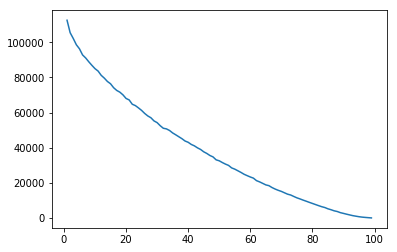

In [21]:
from sklearn.cluster import KMeans

n_clusters = np.arange(1,100)
inertias = []

for k in n_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_scale)
    
    inertias.append(kmeans.inertia_)
    
plt.plot(n_clusters, inertias)
plt.show()

### No clear 'elbow' here, so used a trial and error method to see which would create the most meaningful clusters. Settled on 60. 

In [22]:
from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=60, n_init=20)
# kmeans.fit(data_scale)

from sklearn.externals import joblib
kmeans = joblib.load('scale_cluster_smooth60Moderns.pkl')

data_scale['cluster'] = kmeans.predict(data_scale)

data_scale_ri = data_scale.reset_index()

display(data_scale.head())

,0,1,2,3,4,5,6,7,8,9,...,1179,1180,1181,1182,1183,1184,1185,1186,1187,cluster
Donald_Trump,-0.095977,-0.083675,-0.346312,-0.457477,-0.471221,-0.507063,-0.453803,-0.413966,-0.082799,-0.314934,...,-0.550640,-0.460190,-0.449093,-0.467340,-0.364464,-0.391490,-0.472586,-0.568566,-0.411404,1
Barack_Obama,-0.179207,-0.320034,-0.370096,-0.343903,-0.329267,-0.354581,-0.422168,-0.511425,-0.519026,-0.517518,...,-0.890439,-0.822915,-0.687365,-0.697854,-0.716950,-0.688872,-0.691636,-0.866193,-0.879950,1
Ronald_Reagan,-0.626364,-0.473300,-0.456168,-0.333367,-0.350397,-0.480584,-0.307515,-0.541522,-0.578044,-0.418517,...,-0.455244,-0.538650,-0.695305,-0.734802,-0.753678,-0.628006,-0.697972,-0.774709,-0.753884,1
George_H._W._Bush,-0.340941,-0.401622,-0.368568,-0.405963,-0.325351,-0.293481,-0.319332,-0.414843,-0.191755,-0.203398,...,-0.504730,-0.486081,-0.486476,-0.472761,-0.455593,-0.368568,-0.278681,-0.428854,-0.457369,1
Bill_Clinton,-0.296163,-0.542904,-0.550870,-0.553870,-0.442035,-0.542283,-0.373237,-0.474520,-0.205019,-0.226434,...,-0.711432,-0.425482,-0.573320,-0.560078,-0.512592,-0.353891,-0.270196,-0.504419,-0.544352,29


In [23]:
# from sklearn.externals import joblib
# joblib.dump(kmeans, 'scale_cluster_smooth60Moderns.pkl') 

In [24]:
people = people.reset_index()

people['cluster'] = data_scale_ri['cluster']

people = people.set_index('index')

people = people.sort_values(by=['Mean_Daily_Views'], ascending=False)

people['Highest_Daily_Views'] = data.drop(columns = ['day']).max()

for c in range(0,60):
    if(len(people[people['cluster']==c]) > 1):
        display(people[people['cluster']==c])

,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Tom_Brady,20438.476431,81432.600205,3.984279,10374.0,0,2421675
Joe_Montana,3376.531987,5385.788330,1.595065,2157.5,0,108310


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Donald_Trump,109383.536195,285027.956553,2.605767,57392.5,1,6125896
Barack_Obama,33006.465488,37499.547324,1.136127,25781.5,1,810030
Ronald_Reagan,18520.319865,26532.274242,1.432603,14204.5,1,549064
George_W._Bush,14496.530303,14797.557190,1.020765,11404.5,1,265110
George_H._W._Bush,14417.593434,26730.275099,1.854004,9647.0,1,640894


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Jeff_Bezos,11992.255892,14495.315987,1.208723,7481.0,2,273596
Ben_Shapiro,5677.651515,5350.929569,0.942455,4739.5,2,104156


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Wayne_Gretzky,5252.608586,3581.161862,0.681787,4456.5,3,43523
Sidney_Crosby,3583.381313,7183.297221,2.004614,2155.0,3,164328


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Eric_Clapton,6918.648148,3859.769882,0.557879,6168.0,4,79555
Chris_Rock,4388.992424,6725.080001,1.532261,3475.0,4,201057
Jacob_Zuma,2447.158249,6010.059282,2.455934,1714.5,4,123873


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Saddam_Hussein,7138.691919,2987.349036,0.418473,6493.0,5,43944
Muammar_Gaddafi,6105.016835,2677.415105,0.438560,5401.5,5,37820


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Natalie_Portman,12923.531145,6969.525955,0.539290,10829.0,6,112295
Mariah_Carey,11762.714646,17956.210484,1.526536,8415.5,6,358491


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Xi_Jinping,4561.641414,3574.886046,0.783684,3700.5,8,47539
Deng_Xiaoping,2027.020202,949.768681,0.468554,1828.0,8,21854


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Conor_McGregor,24261.728114,55015.752283,2.267594,13568.5,9,1260585
Floyd_Mayweather_Jr.,12338.154882,56614.138823,4.588542,6103.0,9,1696522
Manny_Pacquiao,6641.143098,11538.835248,1.737477,4806.0,9,250298


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Theresa_May,8994.998316,27398.361828,3.045955,5060.5,10,526311
David_Cameron,5794.859428,14253.227799,2.459633,3913.5,10,353590


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
John_Lennon,11399.452020,5361.855268,0.470361,10313.0,11,84942
Paul_McCartney,10308.994108,9575.352126,0.928835,8672.5,11,199191


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Nancy_Pelosi,4000.367003,5237.648676,1.309292,2754.5,13,81277
Mitch_McConnell,3142.934343,4013.292800,1.276925,1957.0,13,59302
Tucker_Carlson,3009.412458,3393.591037,1.127659,2157.0,13,41335
Chuck_Schumer,2985.040404,3880.571068,1.300006,1966.0,13,64838


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Ronda_Rousey,16079.071549,49981.192936,3.108463,7805.0,14,949324
Amy_Schumer,9659.134680,10323.383609,1.068769,6493.5,14,133158
James_Brown,4704.667508,2774.583909,0.589751,3859.0,14,38952


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Justin_Trudeau,13205.148990,46805.293202,3.544473,7481.5,15,1205401
Pierre_Trudeau,4161.662458,14745.865165,3.543263,2620.5,15,454036
Stephen_Harper,2240.579966,6809.912901,3.039353,1298.5,15,209314


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Muhammad_Ali,23038.116162,144681.298138,6.280084,12980.0,16,4395198
Mike_Tyson,11417.203704,7953.743962,0.696646,9643.5,16,138015
Joe_Frazier,2984.158249,14388.562355,4.821649,1733.5,16,367284


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Emmanuel_Macron,8282.337542,38568.784742,4.656751,3846.0,17,811008
Marine_Le_Pen,3244.164983,11104.414621,3.422888,831.5,17,196571
Ella_Fitzgerald,2152.292088,1525.460494,0.708761,1943.0,17,42422


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Tupac_Shakur,20602.045455,12596.351312,0.611413,17181.5,18,223336
The_Notorious_B.I.G.,11009.485690,6584.410741,0.598067,9331.5,18,107918


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Leonardo_DiCaprio,23331.529461,56862.633299,2.437158,17318.0,20,1750680
Bernie_Sanders,18103.600168,31666.873819,1.749203,6164.5,20,486363
Ted_Cruz,10071.081650,24255.308943,2.408412,3113.0,20,595533
Cenk_Uygur,1462.657407,966.374320,0.660698,1237.5,20,18080


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Vladimir_Putin,16071.574916,11814.167168,0.735097,12571.5,21,195529
Mikhail_Gorbachev,4853.515152,1887.714040,0.388937,4392.0,21,33417


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
George_Soros,8720.095118,9151.216409,1.049440,6177.0,23,98717
Richard_B._Spencer,3373.425926,11945.135050,3.540951,1500.0,23,234011


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
LeBron_James,24998.877104,46370.657495,1.854910,16295.5,26,1129366
Michael_Jordan,20985.099327,10597.115448,0.504983,18772.0,26,138106


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Bill_Gates,15936.142256,3900.349804,0.244749,15397.0,28,51486
Warren_Buffett,11146.730640,4930.119800,0.442293,9851.0,28,71709


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Hillary_Clinton,21293.967172,48826.339845,2.292966,10030.0,29,1229627
Bill_Clinton,16268.127104,21755.971550,1.337337,11672.5,29,413206
Anderson_Cooper,6543.432660,10651.462203,1.627810,4571.0,29,280660


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Steve_Jobs,23320.299663,14171.491607,0.607689,18624.0,37,258692
Justin_Bieber,19689.264310,13079.778375,0.664310,17225.0,37,191523


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Marlon_Brando,9345.550505,5877.878956,0.628949,8102.5,40,136394
Al_Pacino,8981.904040,3135.015108,0.349037,8358.0,40,71826


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Narendra_Modi,11257.276094,5551.300624,0.493130,9803.0,59,60337
Leonard_Cohen,6181.101010,42960.251442,6.950259,3205.5,59,1391697


In [25]:
peopleclust = pd.DataFrame()

for c in range(0,60):
    if(len(people[people['cluster']==c]) > 1):
        peopleclust = peopleclust.append(people[people['cluster']==c])

peopleclust['cluster'] = peopleclust['cluster'].replace(59,7)
peopleclust['cluster'] = peopleclust['cluster'].replace(40,12)
peopleclust['cluster'] = peopleclust['cluster'].replace(37,19)
peopleclust['cluster'] = peopleclust['cluster'].replace(29,22)
peopleclust['cluster'] = peopleclust['cluster'].replace(28,24)
peopleclust['cluster'] = peopleclust['cluster'].replace(26,25)

peopleclust = peopleclust.sort_values(ascending=True, by='cluster')

peopleclust = peopleclust.reset_index()

peopleclust['Position'] = peopleclust.index.values

color_list = ['orangered','green','blue', 'black', 'orange', 'aqua', 'brown', 'purple', 'turquoise', 'red', 'gray', 'olive', 'navy', 'pink', 'maroon', 'darkkhaki', 'orangered','green','blue', 'black', 'orange', 'aqua', 'brown', 'purple', 'turquoise', 'red', 'gray', 'olive', 'navy']

peopleclust['Color'] = 0

for i in peopleclust.index.values:
    peopleclust['Color'].loc[i] = color_list[peopleclust['cluster'].loc[i]]

peopleclust = peopleclust.rename(columns = {'index':'Name'})
display(peopleclust.head())

,Name,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views,Position,Color
0,Tom_Brady,20438.476431,81432.600205,3.984279,10374.0,0,2421675,0,orangered
1,Joe_Montana,3376.531987,5385.788330,1.595065,2157.5,0,108310,1,orangered
2,Donald_Trump,109383.536195,285027.956553,2.605767,57392.5,1,6125896,2,green
3,Barack_Obama,33006.465488,37499.547324,1.136127,25781.5,1,810030,3,green
4,Ronald_Reagan,18520.319865,26532.274242,1.432603,14204.5,1,549064,4,green


In [26]:
import bokeh.plotting as bpl
import bokeh.models as bmo
from bokeh.plotting import figure, show, output_notebook
from bokeh.resources import CDN
from bokeh.embed import file_html

output_notebook()

source = bpl.ColumnDataSource.from_df(peopleclust)

hover = bmo.HoverTool(
    tooltips=[
        ('Name', '@Name'),
        ("Mean Daily Views", '@Mean_Daily_Views{int}'),
        ("Median Daily Views", '@Median{int}'),
        ("Standard Deviation", '@Standard_Deviation{int}'),
        ("Highest Daily Views", '@Highest_Daily_Views{int}')
    ]
)

TOOLS="crosshair,pan,wheel_zoom,box_zoom,reset,tap,save,box_select,"

p = figure(tools=[TOOLS,hover],plot_width=900, plot_height=1400)

p.scatter('cluster', 'Position', radius = 0.25, fill_color = 'Color', source=source)

# html = file_html(p, CDN, "ModernsCluster")

# Html_file= open("ModernsClustering.html","w")
# Html_file.write(html)
# Html_file.close()
show(p)

Loading BokehJS ...